In [47]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns; sns.set_theme()


In [3]:
df = pd.read_csv('greenbuildings.csv')

In [10]:
df = df.set_index(df['CS_PropertyID'])
df = df.drop(columns='CS_PropertyID')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7894 entries, 379105 to 157086
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cluster            7894 non-null   int64  
 1   size               7894 non-null   int64  
 2   empl_gr            7820 non-null   float64
 3   Rent               7894 non-null   float64
 4   leasing_rate       7894 non-null   float64
 5   stories            7894 non-null   int64  
 6   age                7894 non-null   int64  
 7   renovated          7894 non-null   int64  
 8   class_a            7894 non-null   int64  
 9   class_b            7894 non-null   int64  
 10  LEED               7894 non-null   int64  
 11  Energystar         7894 non-null   int64  
 12  green_rating       7894 non-null   int64  
 13  net                7894 non-null   int64  
 14  amenities          7894 non-null   int64  
 15  cd_total_07        7894 non-null   int64  
 16  hd_total07       

In [29]:
dfr = df.drop(columns='cluster')
y, X = dmatrices('Rent ~ size + age + leasing_rate + green_rating',data=dfr,return_type='dataframe')

model = sm.OLS(y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.430
Date:                Wed, 11 Aug 2021   Prob (F-statistic):            0.00370
Time:                        14:12:54   Log-Likelihood:                -32613.
No. Observations:                7894   AIC:                         6.523e+04
Df Residuals:                    7892   BIC:                         6.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       28.2668      0.177    159.275   

In [36]:
formula =  'Rent ~ ' + ' + '.join(dfr.columns).replace(' + Rent','')
formula

'Rent ~ size + empl_gr + leasing_rate + stories + age + renovated + class_a + class_b + LEED + Energystar + green_rating + net + amenities + cd_total_07 + hd_total07 + total_dd_07 + Precipitation + Gas_Costs + Electricity_Costs + cluster_rent'

In [41]:
dfr = df.drop(columns='cluster')
formula =  'Rent ~ ' + ' + '.join(dfr.columns).replace(' + Rent','')
y, X = dmatrices(formula,data=dfr,return_type='dataframe')

model = sm.OLS(y,X)
result = model.fit()
# print(result.summary())
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     647.7
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:23:55   Log-Likelihood:                -28624.
No. Observations:                7820   AIC:                         5.729e+04
Df Residuals:                    7800   BIC:                         5.743e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.7165      0.997     -7.737      0.000      -9.671      -5.762
size               6.686e-06   6.56e-07     10.193      0.000     5.4e-06    7.97e-06
empl_gr               0.0607      0.017      3.585      0.000       0.028       0.094
leasing_rate          0.0089      0.005      1.669      0.095      -0.002       0.019
stories              -0.0362      0.016     -2.240      0.025      -0.068      -0.005
age                  -0.0127      0.005     -2.698      0.007      -0.022      -0.003
renovated            -0.2201      0.257     -0.858      0.391      -0.723       0.283
class_a               2.8540      0.438      6.518      0.000       1.996       3.712
class_b               1.1789      0.343      3.439      0.001       0.507       1.851
LEED                  1.9010      3.584      0.530      0.596      -5.125       8.926
Energystar           -0.0444      3.819     -0.012      0.991      -7.530       7.441
green_rating          0.5536      3.840      0.144      0.885      -6.974       8.081
net                  -2.5371      0.593     -4.278      0.000      -3.700      -1.375
amenities             0.6043      0.250      2.414      0.016       0.114       1.095
cd_total_07          -0.0003      9e-05     -2.925      0.003      -0.000   -8.69e-05
hd_total07            0.0004   6.02e-05      6.643      0.000       0.000       0.001
total_dd_07           0.0001   6.65e-05      2.055      0.040    6.33e-06       0.000
Precipitation         0.0439      0.016      2.748      0.006       0.013       0.075
Gas_Costs          -344.3834     76.135     -4.523      0.000    -493.629    -195.138
Electricity_Costs   193.7564     24.889      7.785      0.000     144.968     242.545
cluster_rent          1.0083      0.014     71.938      0.000       0.981       1.036
==============================================================================
Omnibus:                     8596.698   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1559669.138
Skew:                           5.316   Prob(JB):                         0.00
Kurtosis:                      71.364   Cond. No.                     5.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.85e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
pd.crosstab(dfr.green_rating,dfr.LEED)

LEED,0,1
green_rating,,
0,7209,0
1,631,54


In [46]:
df.groupby('green_rating')['Rent'].mean()
df.groupby('renovated')['Rent'].mean() # not renovated is higher?
df.groupby('class_a')['Rent'].mean()

class_a
0    25.819493
1    32.318416
Name: Rent, dtype: float64

In [60]:
dfp = dfr.copy()
dfp['type'] = dfp['green_rating'].apply(lambda x: 'green' if x ==1 else 'not_green')
dfp.type.value_counts()

not_green    7209
green         685
Name: type, dtype: int64

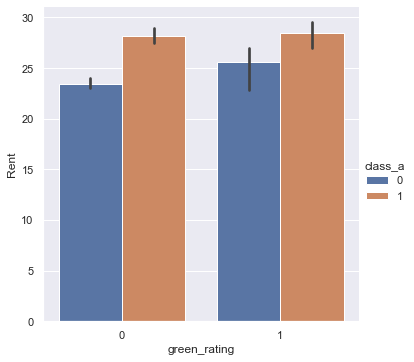

In [72]:
# Yikes!
import numpy as np
sns.catplot(data=dfp,y='Rent',x='green_rating',kind='bar',hue='class_a',estimator=np.median)

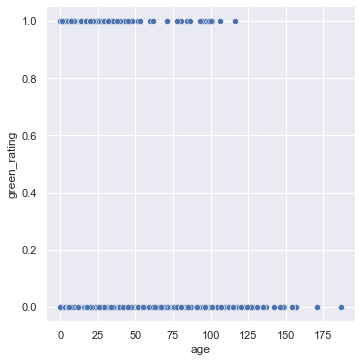

In [75]:
# Shows that ages are lower for greens
sns.relplot(data=dfr,x='age',y='green_rating')


<AxesSubplot:xlabel='green_rating', ylabel='age'>

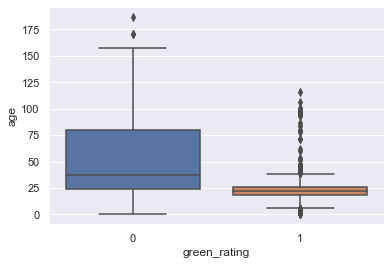

In [85]:
# Age and rating
sns.boxplot(data=dfr,y='age',x='green_rating')

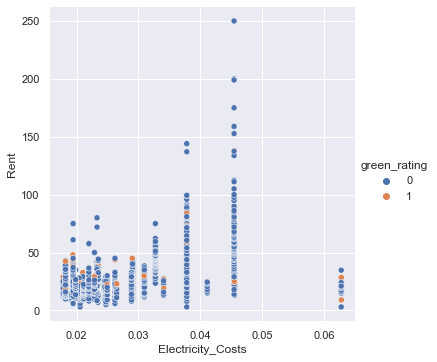

In [90]:
sns.relplot(data=dfr,y='Rent',x='Electricity_Costs',hue='green_rating')